# Spam Detection Filter System
<font size=4>Name: Ahmad Amjad Mughal </font><br>
<font size=4>Reg No: 121672 </font><br>
<font size=4>Class: BSCS-6C </font><br>
<font size=4>Natural Lanuguage Processing Semester Project</font>

In [73]:
#Included Packages and Libraries
import nltk
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [8]:
#It returns the string without any trailing character like space
messages=[line.rstrip() for line in open('Spam')]

In [9]:
#It prints the length of list means total no. of messages
print(len(messages))

5574


In [10]:
#Prints the first 10 messages
for mess_no,message in enumerate(messages[:5]):
    print(mess_no,message)
    print('/n')

(0, 'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')
/n
(1, 'ham\tOk lar... Joking wif u oni...')
/n
(2, "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")
/n
(3, 'ham\tU dun say so early hor... U c already then say...')
/n
(4, "ham\tNah I don't think he goes to usf, he lives around here though")
/n


These are tab separated files in which first column is ham/spam

In [11]:
#dataframe messages which is a two dimensional datastructure with column headers label and message
messages=pd.read_csv('Spam',sep='\t',names=['label','message'])

In [12]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#Statistical information of messages dataframe
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
#Statistcal information of messages separated by label
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Feature Engineering

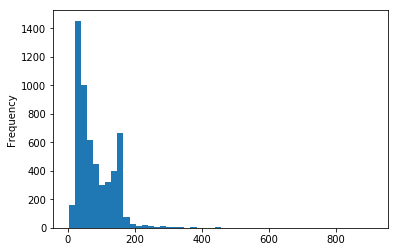

In [15]:
#A separate Column that shows the length of that specific message in a messages dataframe
messages['length']=messages['message'].apply(len)
#Histogram that shows the frequency of charachters in messages
messages['length'].plot.hist(bins=50)

In [16]:
messages['length'].describe()

count    5572.000000
mean       80.616296
std        60.015593
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

Some of the messages are really large like 910 words. Lets check out what that message represents

In [17]:
#print the longest message of length max
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EF869B0>,
      dtype=object)

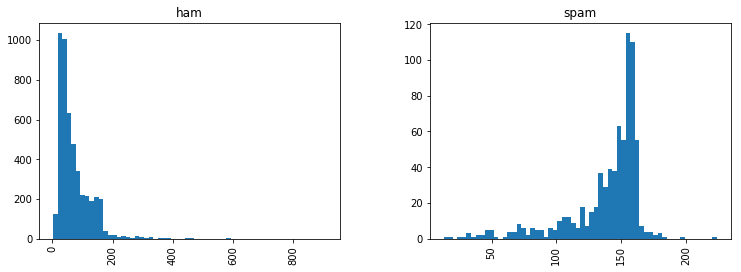

In [18]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

SPAM messages generally have more type of characters

Now we will do feature engineering and use BAG OF WORDS Technique to do analysis

Sample example for removing the punctuation in a string

In [19]:
mess='Hey! This is my NLP Semester Project.'
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
nopunc=[c for c in mess if c not in string.punctuation]
print(nopunc)

['H', 'e', 'y', ' ', 'T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'm', 'y', ' ', 'N', 'L', 'P', ' ', 'S', 'e', 'm', 'e', 's', 't', 'e', 'r', ' ', 'P', 'r', 'o', 'j', 'e', 'c', 't']


In [21]:
nopunc=''.join(nopunc)
print(nopunc)

Hey This is my NLP Semester Project


See we removed the punctuations. Now we want to remove words like a, then, that ,basically grammer

In [22]:
#It returns a cleaned string message in the form of list after the removal of grammer words.
clean_message=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
print(clean_message)

['Hey', 'NLP', 'Semester', 'Project']


It can be observed that now we have list of words with no punctuation and no grammer words (stop words). Next we write a function for this so that we can be used for the Data Frame

In [23]:
#A filter that does bag of words analysis and Normalization
def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    
    nopunc=''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]

In [24]:
#We apply the filter to the top 5 messages
messages['message'].head(2).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
Name: message, dtype: object

This is a very simple normalization. There are other libraries which can be used. For example, stemming 

CountVectorizer count how many times does a word occur in each message(tf) Weight the counts, so that frequent tokens get lower weight (inverse document frequency).

In [26]:
vectorizer = CountVectorizer(text_process).fit(messages['message'])
bagofwordsVectorizer = vectorizer.fit_transform(messages['message'])
print("(ROW, COLUMN)   (FREQUENCY OF WORD)")
print(bagofwordsVectorizer)

(ROW, COLUMN)   (FREQUENCY OF WORD)
  (0, 8324)	1
  (0, 1082)	1
  (0, 3615)	1
  (0, 7694)	1
  (0, 2061)	1
  (0, 1765)	1
  (0, 4501)	1
  (0, 8548)	1
  (0, 3655)	1
  (0, 1767)	1
  (0, 4114)	1
  (0, 5571)	1
  (0, 1316)	1
  (0, 2338)	1
  (0, 5958)	1
  (0, 4374)	1
  (0, 8084)	1
  (0, 3571)	1
  (1, 5567)	1
  (1, 8450)	1
  (1, 4342)	1
  (1, 4537)	1
  (1, 5538)	1
  (2, 77)	1
  (2, 1169)	1
  :	:
  (5570, 1802)	1
  (5570, 3489)	1
  (5570, 2905)	1
  (5570, 7099)	1
  (5570, 1794)	1
  (5570, 8120)	1
  (5570, 2606)	1
  (5570, 5367)	1
  (5570, 1451)	1
  (5570, 7674)	1
  (5570, 3323)	1
  (5570, 7089)	1
  (5570, 4642)	1
  (5570, 1097)	1
  (5570, 8371)	1
  (5570, 4245)	1
  (5570, 3805)	1
  (5570, 7806)	1
  (5570, 3373)	1
  (5570, 4114)	1
  (5571, 6548)	1
  (5571, 7938)	1
  (5571, 4253)	2
  (5571, 5276)	1
  (5571, 7806)	1


In [27]:
print("Count of Vocabulary words = Features")
print(len(vectorizer.vocabulary_))

Count of Vocabulary words = Features
8713


In [28]:
current_message=messages['message'][6]

In [29]:
print(current_message)

Even my brother is not like to speak with me. They treat me like aids patent.


In [30]:
bagofwords_current=vectorizer.transform([current_message])
print("(ROW, COLUMN)   (FREQUENCY OF WORD)")
print(bagofwords_current)

(ROW, COLUMN)   (FREQUENCY OF WORD)
  (0, 1004)	1
  (0, 1737)	1
  (0, 3012)	1
  (0, 4233)	1
  (0, 4642)	2
  (0, 4968)	2
  (0, 5254)	1
  (0, 5438)	1
  (0, 5758)	1
  (0, 7161)	1
  (0, 7702)	1
  (0, 7806)	1
  (0, 7916)	1
  (0, 8492)	1


In [31]:
print("FEATURES")
print(bagofwords_current.shape)

FEATURES
(1, 8713)


In [32]:
print("Any specific feature")
vectorizer.get_feature_names()[8223]

Any specific feature


u'visionsms'

In [33]:
messages_bagofwords=vectorizer.transform(messages['message'])

In [34]:
print("(MESSAGES, WORDS)")
print('Shape of Sparse Matrix: ',messages_bagofwords.shape)

(MESSAGES, WORDS)
('Shape of Sparse Matrix: ', (5572, 8713))


In [35]:
#Non zero occurences
messages_bagofwords.nnz

74169

In [36]:
#TF IDF

from sklearn.feature_extraction.text import TfidfTransformer

In [37]:
#Term-Frequency Inverse-document-transformer to show how a word is important to document 
tfidf_transformer=TfidfTransformer().fit(messages_bagofwords)

In [38]:
tfidf_sample=tfidf_transformer.transform(bagofwords_current)

In [39]:
print("(ROW, COLUMN)   (WEIGHT OF WORD(FEATURE))")
print(tfidf_sample)

(ROW, COLUMN)   (WEIGHT OF WORD(FEATURE))
  (0, 8492)	0.168448328700665
  (0, 7916)	0.3039072370980544
  (0, 7806)	0.09818080872247346
  (0, 7702)	0.21760216489302706
  (0, 7161)	0.2728946193421157
  (0, 5758)	0.3996575420294158
  (0, 5438)	0.16052524951106445
  (0, 5254)	0.14342835272663845
  (0, 4968)	0.27628468672347467
  (0, 4642)	0.37472195145479226
  (0, 4233)	0.13429789042949963
  (0, 3012)	0.24601494556750553
  (0, 1737)	0.2944528984899668
  (0, 1004)	0.3996575420294158


In [40]:
print("Frequency of university word in a sparse matrix")
tfidf_transformer.idf_[vectorizer.vocabulary_['university']]

Frequency of university word in a sparse matrix


8.239394426449646

In [41]:
messages_tfidf=tfidf_transformer.transform(messages_bagofwords)
print("(ROW, COLUMN)   (WEIGHT OF A FEATURE)")
print(messages_tfidf)

(ROW, COLUMN)   (WEIGHT OF A FEATURE)
  (0, 8548)	0.22083291550052703
  (0, 8324)	0.18241264829651851
  (0, 8084)	0.23001810878216972
  (0, 7694)	0.1555161950550194
  (0, 5958)	0.25535167546045223
  (0, 5571)	0.15602976712614566
  (0, 4501)	0.27580485521143805
  (0, 4374)	0.32647198856800297
  (0, 4114)	0.1069931616636402
  (0, 3655)	0.18034330636364296
  (0, 3615)	0.15305130991688437
  (0, 3571)	0.14787418026870422
  (0, 2338)	0.25283008183768235
  (0, 2061)	0.27580485521143805
  (0, 1767)	0.27580485521143805
  (0, 1765)	0.3116528020516887
  (0, 1316)	0.24419040033995174
  (0, 1082)	0.32647198856800297
  (1, 8450)	0.43162957585464123
  (1, 5567)	0.5466243141314314
  (1, 5538)	0.2718944069420321
  (1, 4537)	0.4083258549263009
  (1, 4342)	0.5236804332035243
  (2, 8506)	0.1868521848510181
  (2, 8463)	0.1448601166108939
  :	:
  (5570, 7099)	0.20541570643501375
  (5570, 7089)	0.18433209615766674
  (5570, 5367)	0.2101107882421641
  (5570, 4642)	0.159545141701127
  (5570, 4245)	0.12207280777

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
spam_detect_model=MultinomialNB().fit(messages_tfidf,messages['label'])

In [44]:
#To prdict the label of a message
spam_detect_model.predict(tfidf_sample)[0]

'ham'

In [45]:
all_pred=spam_detect_model.predict(messages_tfidf)
print(all_pred)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


Everything above was done training data and hence we won't be able to judge the model. So let's split the data and re do it

In [47]:
#Split the dataframe into test and train data with the ratio of 75-25
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['label'],test_size=0.25)

In [48]:
#Instead of doing everything again, in which we have to get rid of punctuation, get rid of stop words, 
# And then do tf and idf we would use Pipelines option
from sklearn.pipeline import Pipeline

In [49]:
#A complete pipeline of Feature Extractor and Bionomial Naive Bayes
pipeline=Pipeline([
        ('bow',CountVectorizer()),
        ('tfidf',TfidfTransformer()),
        ('classifier',MultinomialNB())
    ])

In [50]:
#Tarin on our train data
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        str...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [51]:
#Test the model on test data
test=pipeline.predict(msg_test)
print(test)

['spam' 'ham' 'ham' ... 'ham' 'spam' 'ham']


In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [71]:
#Displays the final report and confusion matrix table to determine the performance of Classifier
print (classification_report(label_test,test))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1195
        spam       1.00      0.70      0.82       198

   micro avg       0.96      0.96      0.96      1393
   macro avg       0.98      0.85      0.90      1393
weighted avg       0.96      0.96      0.95      1393



In [72]:
CF = confusion_matrix(label_test,test)
trueNegative = CF[0][0]
print("TRUE NEAGTIVE",trueNegative)
falseNegative = CF[1][0]
print("FALSE NEAGTIVE",falseNegative)
truePositive = CF[1][1]
print("TRUE POSITIVE",truePositive)
falsePositive = CF[0][1]
print("FALSE POSITIVE",falsePositive)

('TRUE NEAGTIVE', 1195)
('FALSE NEAGTIVE', 60)
('TRUE POSITIVE', 138)
('FALSE POSITIVE', 0)
